# Appendix

**Importing libraries needed**

In [1]:
library(tidyverse)
library(gridExtra)
library(survival)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




**Reading dataset, removing unused column, printing first 5 rows of data**

In [2]:
vision_df = read_csv('diabeticVision.csv')
vision_df <- vision_df[, -1]
head(vision_df)

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  id = col_double(),
  laser = col_character(),
  eye = col_character(),
  age = col_double(),
  type = col_character(),
  trt = col_double(),
  futime = col_double(),
  status = col_double(),
  risk = col_double()
)



id,laser,eye,age,type,trt,futime,status,risk
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5,argon,left,28,adult,1,46.23,0,9
5,argon,left,28,adult,0,46.23,0,9
14,argon,right,12,juvenile,1,42.50,0,8
14,argon,right,12,juvenile,0,31.30,1,6
16,xenon,right,9,juvenile,1,42.27,0,11
16,xenon,right,9,juvenile,0,42.27,0,11


**Finding number of unique ids (number of study participant)**

In [3]:
vision_df$id %>% unique()%>% length()

[1] 197

**Plotting histrograms of patient information by firstly getting non-duplicated information on patient by filtering for just one eye observation from each patient (control eye)**

In [4]:
control_df = vision_df %>% filter(trt==0)

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



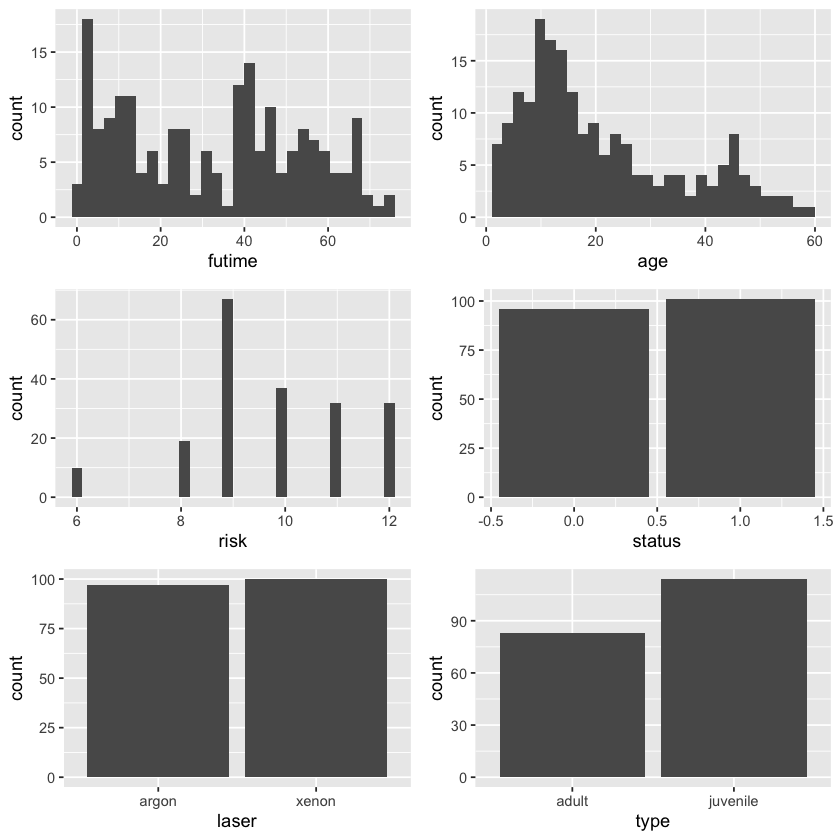

In [5]:
plot1 <- ggplot(data = control_df) + geom_histogram(aes(x = futime))
plot2 <- ggplot(data = control_df) + geom_histogram(aes(x = age))
plot3 <- ggplot(data = control_df) + geom_histogram(aes(x = risk))
plot4 <- ggplot(data = control_df) + geom_histogram(aes(x = status), stat = 'count')
plot5 <- ggplot(data = control_df) + geom_histogram(aes(x = laser), stat = 'count')
plot6 <- ggplot(data = control_df) + geom_histogram(aes(x = type), stat = 'count')
grid.arrange(plot1, plot2, plot3, plot4, plot5, plot6, ncol=2, nrow = 3)

**Plotting distribution of eye status by whether eye was treated or a control**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


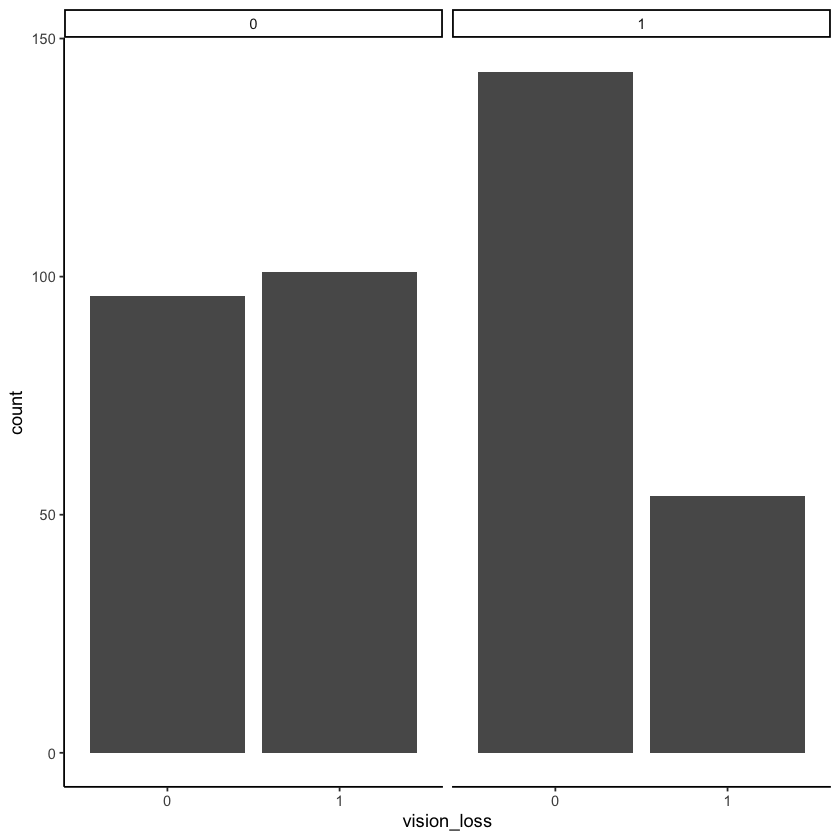

In [6]:
ggplot(vision_df) + geom_histogram(aes(x=factor(status)), stat="count") + xlab('vision_loss') + facet_wrap(~trt) + theme_classic()

A difference can be seen, such that there are less loss of vision in treated eyes than controlled eyes.

**Plotting distribution of eye status by type of treatment**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


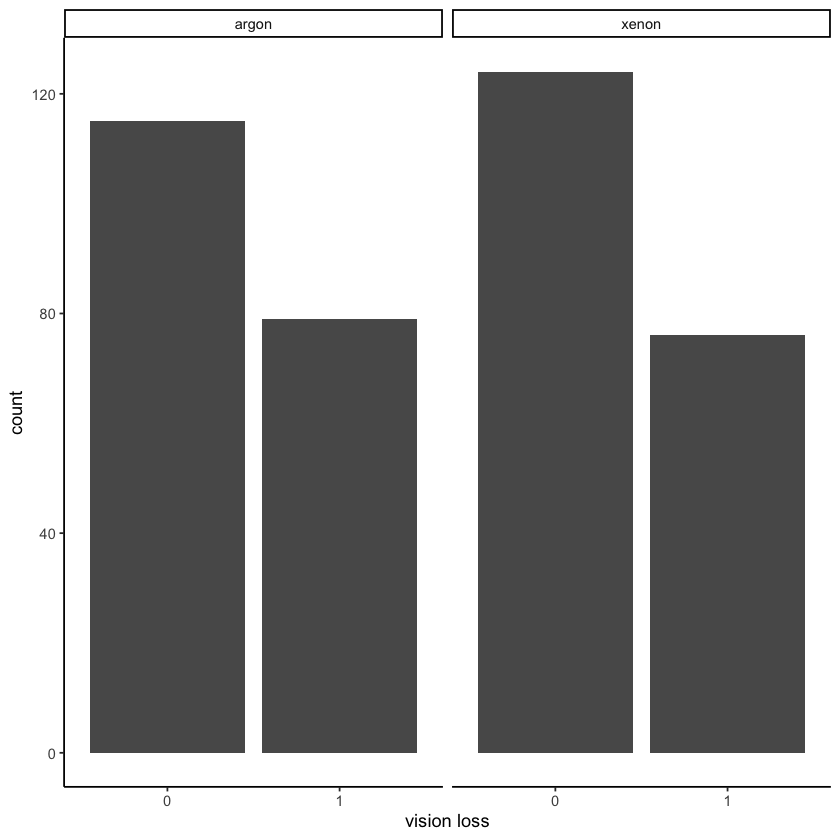

In [7]:
ggplot(vision_df) + geom_histogram(aes(x=factor(status)), stat="count") + xlab('vision loss') + facet_wrap(~laser) + theme_classic()

There doesn't seem to be any significant difference observed between the two types of treatment above.

**Filtering data to have all observations where eye is treated**

In [8]:
treated_df = vision_df %>% filter(trt == 1)

**Plotting histogram of eye status by laser type among treated eyes**

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


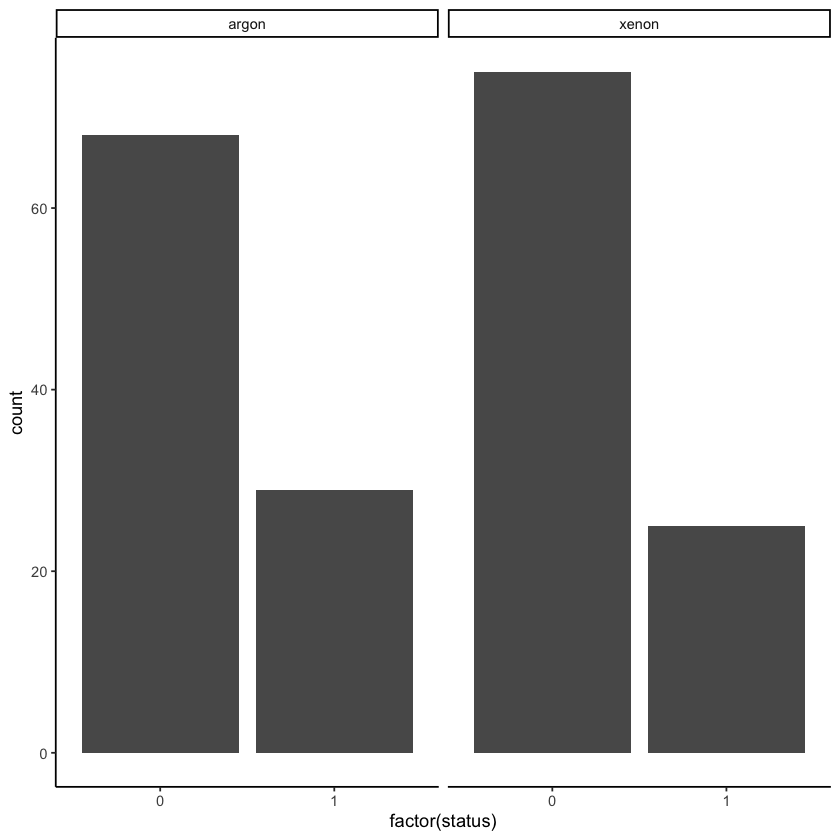

In [9]:
ggplot(treated_df) + geom_histogram(aes(x=factor(status)), stat="count") + facet_wrap(~laser) + theme_classic()

**Plotting boxplot of `risk` and `status` against `age`**

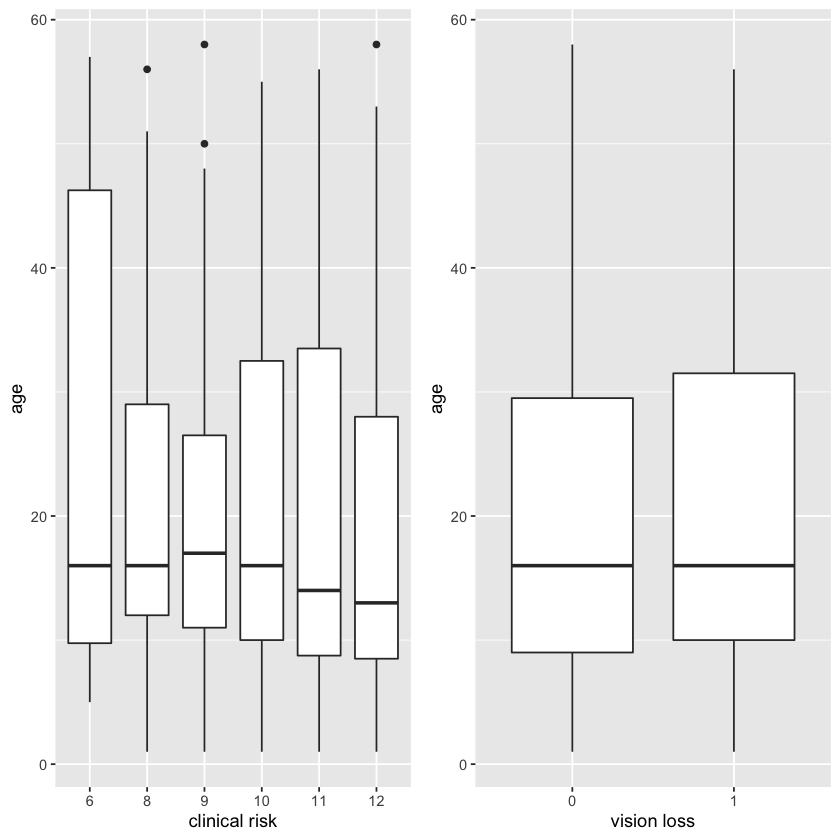

In [10]:
plot1 = ggplot(vision_df) + geom_boxplot(aes(x = factor(risk), y = age)) + xlab('clinical risk')
plot2 = ggplot(vision_df) + geom_boxplot(aes(x = factor(status), y = age)) + xlab('vision loss')
grid.arrange(plot1, plot2, ncol=2, nrow =1 )

There doesn't seem to be any significant difference in `status` between ages.
There might be a little difference in `risk` between `age`, such that higher risks are associated with lower age at time diabetes diagnosis was made.

**Converting time to vision loss to be in terms of years**

In [11]:
vision_df$futime = vision_df$futime/12

**Getting statistical summary of columns in the data**

In [12]:
summary(vision_df)

       id            laser               eye                 age       
 Min.   :   5.0   Length:394         Length:394         Min.   : 1.00  
 1st Qu.: 480.0   Class :character   Class :character   1st Qu.:10.00  
 Median : 834.0   Mode  :character   Mode  :character   Median :16.00  
 Mean   : 873.2                                         Mean   :20.78  
 3rd Qu.:1296.0                                         3rd Qu.:30.00  
 Max.   :1749.0                                         Max.   :58.00  
     type                trt          futime          status      
 Length:394         Min.   :0.0   Min.   :0.025   Min.   :0.0000  
 Class :character   1st Qu.:0.0   1st Qu.:1.165   1st Qu.:0.0000  
 Mode  :character   Median :0.5   Median :3.233   Median :0.0000  
                    Mean   :0.5   Mean   :2.965   Mean   :0.3934  
                    3rd Qu.:1.0   3rd Qu.:4.521   3rd Qu.:1.0000  
                    Max.   :1.0   Max.   :6.247   Max.   :1.0000  
      risk       
 Min.   :

**Getting number of observations in each groups of the following variables**

In [13]:
print(factor(vision_df$eye) %>% summary())
print(factor(vision_df$status) %>% summary())
print(factor(vision_df$laser) %>% summary())

 left right 
  216   178 
  0   1 
239 155 
argon xenon 
  194   200 


**Baseline table**

| Variable| Median (IQR) or Percent |
| :-- | :-- |
| Argon type of treatment, instead of Xenon (%) | 49.24 | 
| Age at time of diabetes diagnosis (years) | 16.00 (10.00, 30.00) |
| Time to loss of vision or last follow-up (years) | 3.23 (1.17, 4.52) |
| Clinical risk of lost of acuity (points) | 10.00 (9.00, 11.00) |
| Loss of vision in eye (%) | 39.34 |


# Fitting survival functions

### Fitting overall survival function

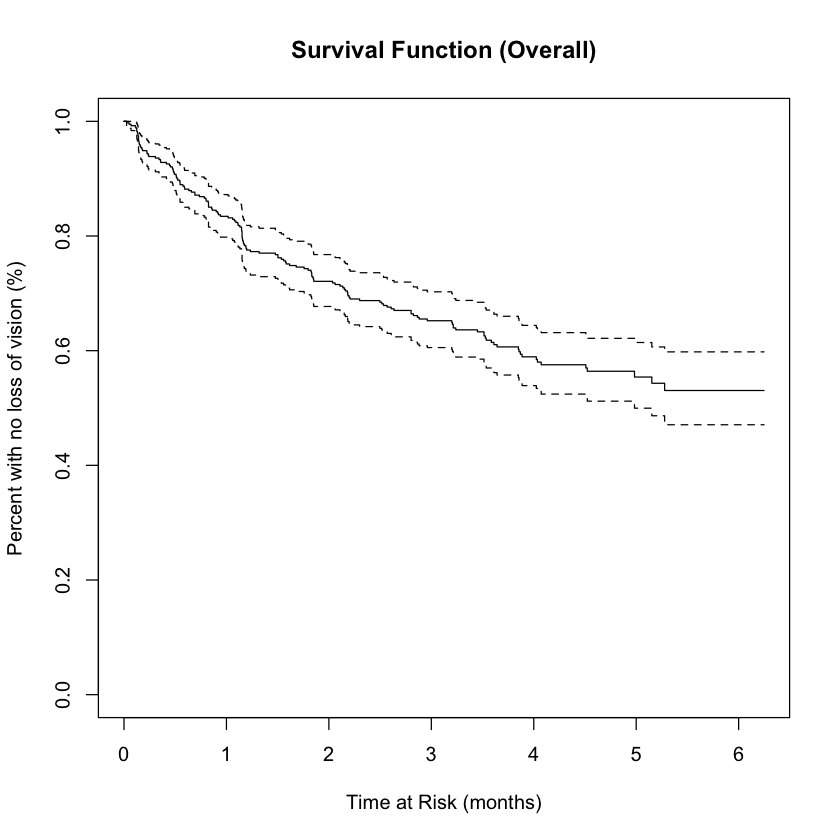

In [14]:
survobj = with(vision_df, Surv(futime, status))
fit0 = survfit(survobj~1, data = vision_df)
# summary(fit0)
plot(fit0, xlab = "Time at Risk (months)",
    ylab = "Percent with no loss of vision (%)",
    main = "Survival Function (Overall)")

**Creating a dataframe specifically for fitting survival functions and plotting them**

In [15]:
surv_df = vision_df %>% mutate(treatment = ifelse(trt == 1, laser, "control"),
                               age = case_when(
                                    age <= 10  ~ "below 10", 
                                    age >10 & age <= 20  ~ "10-20", 
                                    age >20 & age <= 30 ~ "20-30",
                                    age >30 & age <= 40 ~ "30-40",
                                    age >40 & age <= 50 ~ "40-50",
                                    age > 50 ~ "above 50"))
surv_df = surv_df %>% mutate(treatment = ifelse(treatment == 'control', paste('control', laser),treatment))
surv_df$type = factor(surv_df$treatment, levels = c('control argon','control xenon','argon', 'xenon'))
surv_df$laser = factor(surv_df$laser, levels = c("argon",'xenon'))
surv_df$risk = factor(surv_df$risk, levels = c(6,7,8,9,10,11,12))
surv_df$trt = factor(surv_df$trt, levels = c(0,1))
surv_df$age = factor(surv_df$age, levels = c("below 10", "10-20","20-30", "30-40", "40-50"))                              

### Fitting survival function by whether eye is treated or a control

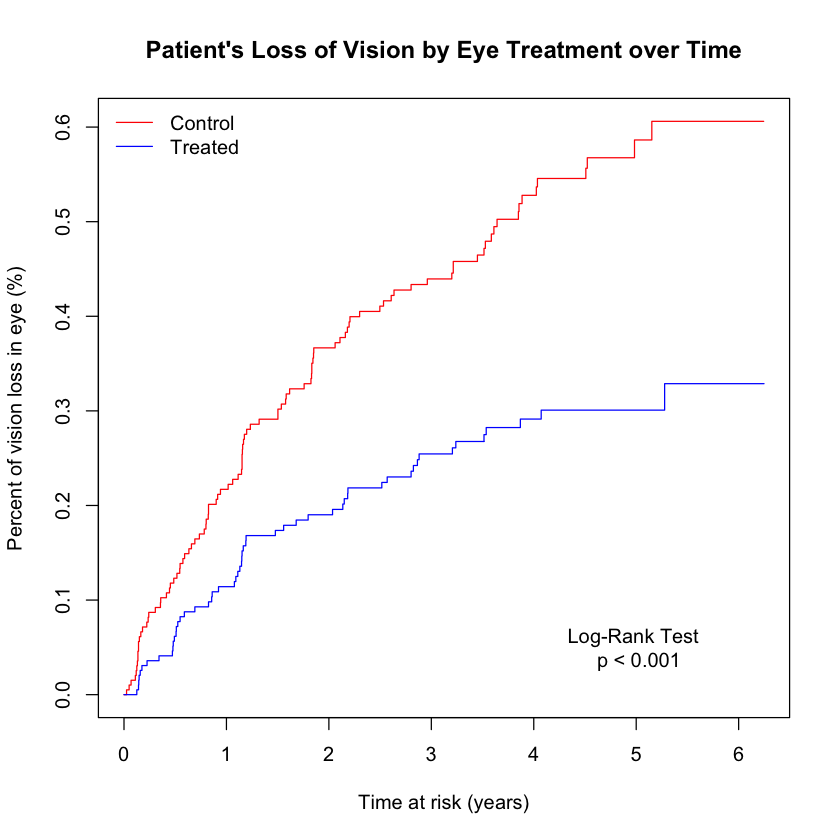

In [16]:
fit_trt = survfit(survobj~trt, data = surv_df)
plot(fit_trt, xlab = "Time at risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Eye Treatment over Time",
    fun = function(x){1-x},
    col = c('red','blue'))
legend('topleft', legend = c("Control",'Treated'), bty='n',
      col = c('red','blue'), lty = 1)
text(5, 0.05, 'Log-Rank Test \n p < 0.001')

**Log-rank test to test difference between eye treatments (control vs. treated)**

In [17]:
survdiff(survobj ~ factor(trt), data = surv_df)

Call:
survdiff(formula = survobj ~ factor(trt), data = surv_df)

                N Observed Expected (O-E)^2/E (O-E)^2/V
factor(trt)=0 197      101     71.8      11.9      22.2
factor(trt)=1 197       54     83.2      10.3      22.2

 Chisq= 22.2  on 1 degrees of freedom, p= 2e-06 

### Fitting survival function by type of treatment (argon vs. xenon)

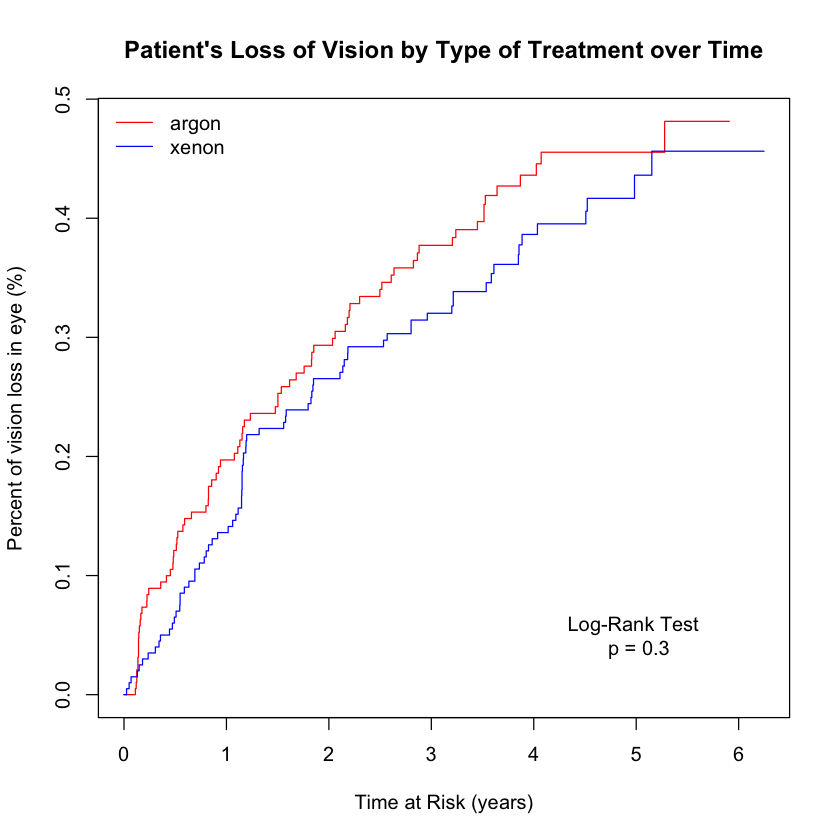

In [18]:
fit_laser = survfit(survobj~laser, data = surv_df)
plot(fit_laser, xlab = "Time at Risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Type of Treatment over Time",
    fun = function(x){1-x},
    col = c('red','blue')[c(1,2)])
legend('topleft', legend = levels(surv_df$laser), bty='n',
      col = c('red','blue'), lty = 1)
text(5, 0.05, 'Log-Rank Test \n p = 0.3')

**Log-rank test to test difference between type of treatment**

In [19]:
survdiff(survobj ~ factor(laser), data = surv_df)

Call:
survdiff(formula = survobj ~ factor(laser), data = surv_df)

                      N Observed Expected (O-E)^2/E (O-E)^2/V
factor(laser)=argon 194       79     72.8     0.534      1.01
factor(laser)=xenon 200       76     82.2     0.473      1.01

 Chisq= 1  on 1 degrees of freedom, p= 0.3 

### Fitting survival function by treatment type (including control)

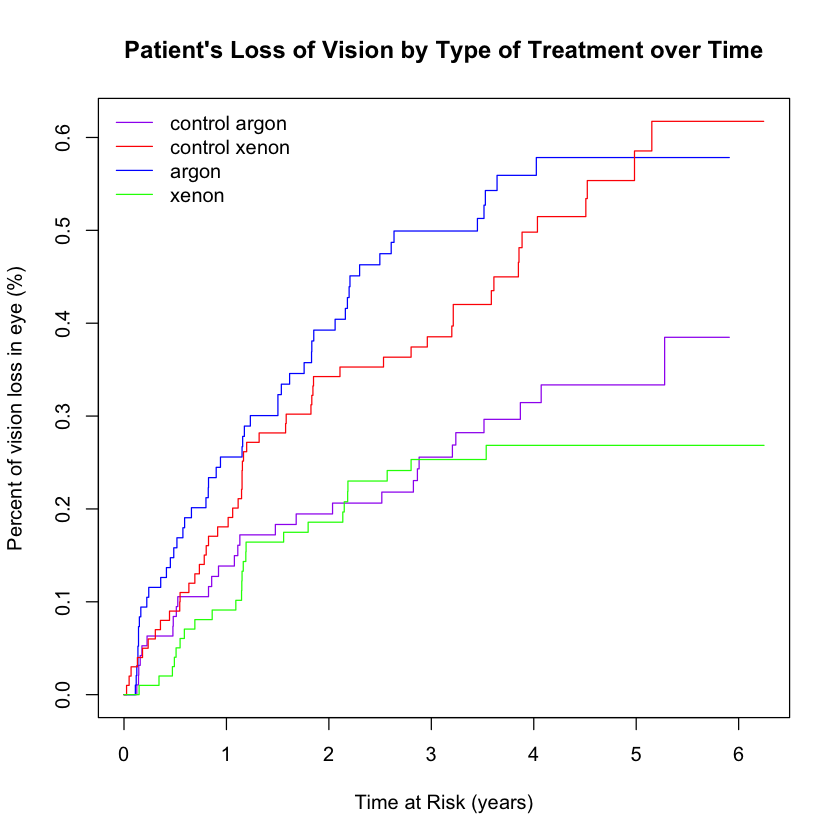

In [20]:
fit_type = survfit(survobj~treatment, data = surv_df)
plot(fit_type, xlab = "Time at Risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Type of Treatment over Time",
    fun = function(x){1-x},
    col = c('purple','blue','red', 'green'))
legend('topleft', legend = levels(surv_df$type), bty='n',
      col = c('purple', 'red','blue','green'), lty = 1)
# text(5, 0.05, 'Log-Rank Test \n p < 0.001')

### Fitting survival function by age of diabetes diagnostic

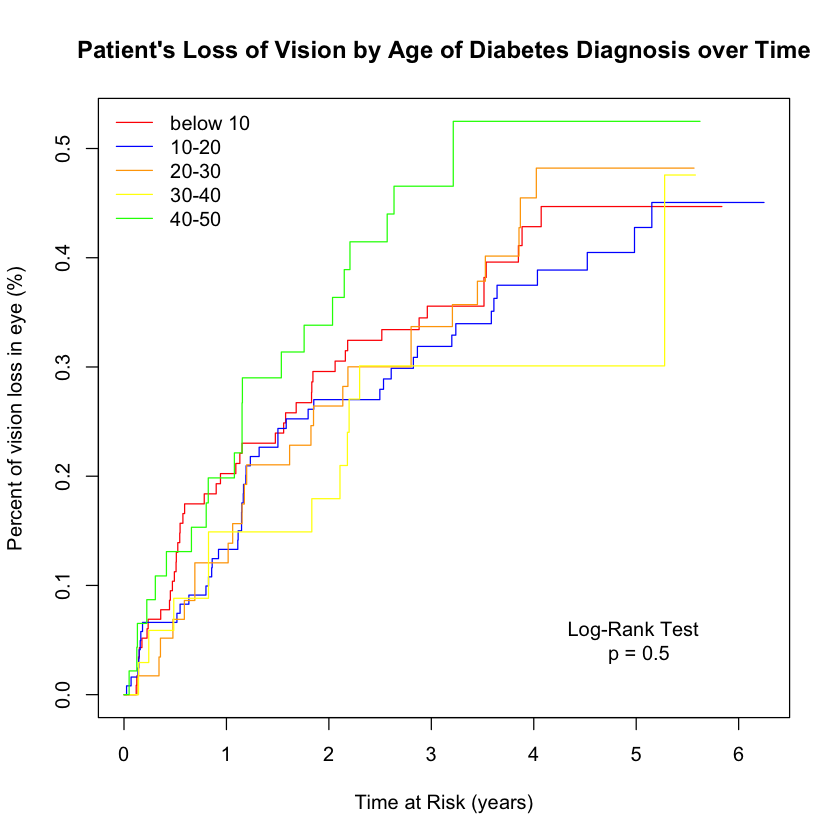

In [21]:
fit_age = survfit(survobj~age, data = surv_df)
plot(fit_age, xlab = "Time at Risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Age of Diabetes Diagnosis over Time",
    fun = function(x){1-x},
    col = c('red', 'blue','orange','yellow','green','purple'))
legend('topleft', legend = levels(surv_df$age), bty='n',
      col = c('red', 'blue','orange','yellow','green','purple'), lty = 1)
text(5, 0.05, 'Log-Rank Test \n p = 0.5')

**Log-rank test to test difference between ages of diabetes diagnosis**

In [22]:
survdiff(survobj ~ age, data = surv_df)

Call:
survdiff(formula = survobj ~ age, data = surv_df)

n=378, 16 observations deleted due to missingness.

               N Observed Expected (O-E)^2/E (O-E)^2/V
age=below 10 116       45     43.8    0.0330    0.0469
age=10-20    124       46     50.3    0.3643    0.5521
age=20-30     58       25     24.1    0.0329    0.0393
age=30-40     34       11     14.8    0.9657    1.0738
age=40-50     46       22     16.0    2.2180    2.4928

 Chisq= 3.6  on 4 degrees of freedom, p= 0.5 

### Fitting survival function by clinical risk 

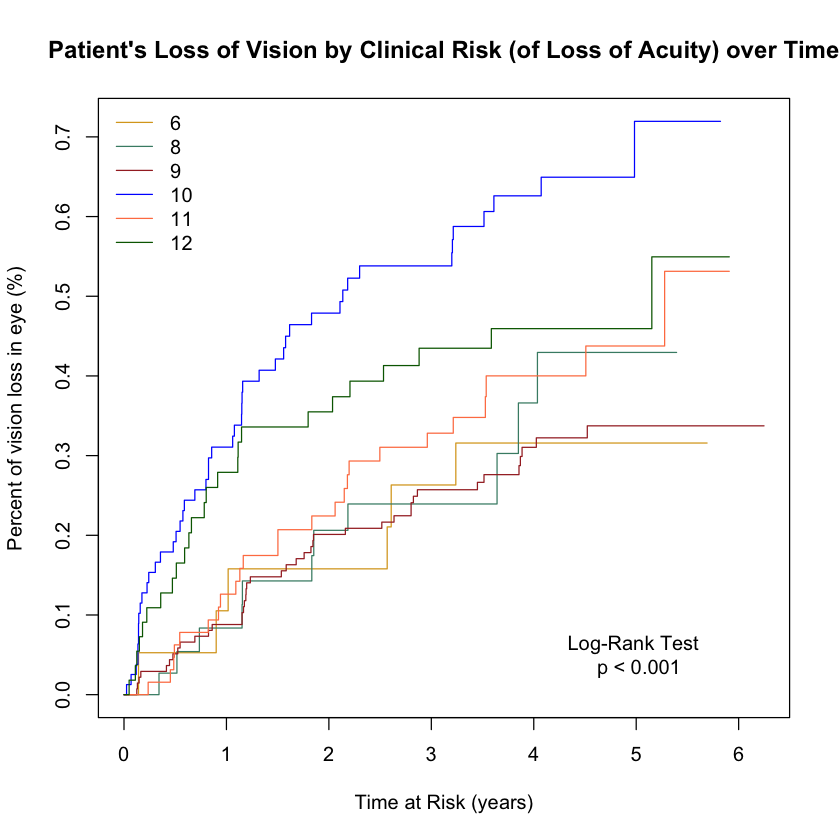

In [23]:
fit_risk = survfit(survobj~risk, data = surv_df)
plot(fit_risk, xlab = "Time at Risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Clinical Risk (of Loss of Acuity) over Time",
    fun = function(x){1-x},
    col = c('goldenrod', 'aquamarine4','brown','blue','coral','darkgreen'))
legend('topleft', legend = levels(surv_df$risk)[c(1,3,4,5,6,7)], bty='n',
      col = c('goldenrod', 'aquamarine4','brown','blue','coral','darkgreen'), lty = 1)
text(5, 0.05, 'Log-Rank Test \n p < 0.001')

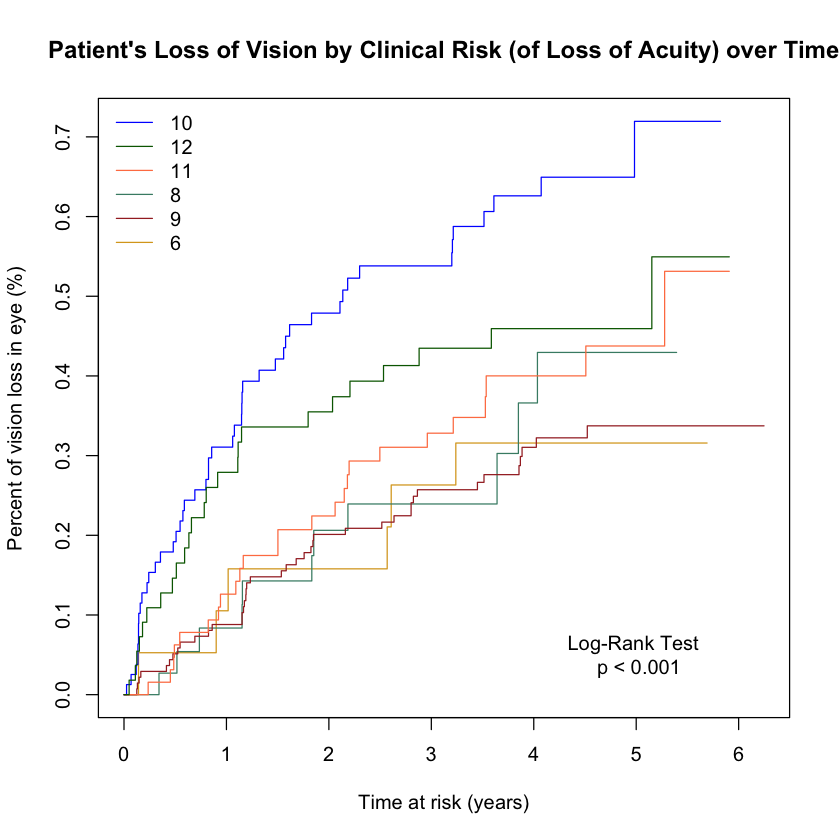

In [24]:
fit_risk = survfit(survobj~risk, data = surv_df)
plot(fit_risk, xlab = "Time at risk (years)",
    ylab = "Percent of vision loss in eye (%)",
    main = "Patient's Loss of Vision by Clinical Risk (of Loss of Acuity) over Time",
    fun = function(x){1-x},
    col = c('goldenrod', 'aquamarine4','brown','blue','coral','darkgreen'))
legend('topleft', legend = levels(surv_df$risk)[c(5,7,6,3,4,1)], bty='n',
      col = c('goldenrod', 'aquamarine4','brown','blue','coral','darkgreen')[c(4,6,5,2,3,1)], lty = 1)
text(5, 0.05, 'Log-Rank Test \n p < 0.001')

**Log-rank test to test difference between clinical risk of loss of acuity**

In [25]:
survdiff(survobj ~ risk, data = surv_df)

Call:
survdiff(formula = survobj ~ risk, data = surv_df)

          N Observed Expected (O-E)^2/E (O-E)^2/V
risk=6   20        6     8.68    0.8285    0.8791
risk=8   37       11    14.73    0.9467    1.0480
risk=9  139       41    61.67    6.9299   11.5767
risk=10  79       47    23.81   22.5717   26.8303
risk=11  64       25    26.33    0.0668    0.0806
risk=12  55       25    19.77    1.3842    1.5887

 Chisq= 33  on 5 degrees of freedom, p= 4e-06 

# Fitting cox proportional hazards model

In [26]:
vision_df$trt = factor(vision_df$trt)
vision_df$laser = factor(vision_df$laser)

In [27]:
survobj_yr = with(vision_df, Surv(futime/12, status))
cox_fit = coxph(survobj ~ laser + age + trt + risk + trt*laser, data = vision_df)
summary(cox_fit)

Call:
coxph(formula = survobj ~ laser + age + trt + risk + trt * laser, 
    data = vision_df)

  n= 394, number of events= 155 

                     coef exp(coef)  se(coef)      z Pr(>|z|)   
laserxenon      -0.169242  0.844304  0.199811 -0.847  0.39699   
age              0.005334  1.005349  0.005473  0.975  0.32976   
trt1            -0.766822  0.464487  0.234227 -3.274  0.00106 **
risk             0.146871  1.158204  0.055728  2.635  0.00840 **
laserxenon:trt1 -0.051551  0.949755  0.338028 -0.153  0.87879   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
laserxenon         0.8443     1.1844    0.5707    1.2490
age                1.0053     0.9947    0.9946    1.0162
trt1               0.4645     2.1529    0.2935    0.7351
risk               1.1582     0.8634    1.0384    1.2919
laserxenon:trt1    0.9498     1.0529    0.4896    1.8422

Concordance= 0.626  (se = 0.023 )
Likelihood ratio test= 31.48  on 5 

**Results**

| Factor | Hazard Rate (95% CI) | p-value |
| :-- | :-- | :-- |
| Xenon treatment type (compared to Argon) | 0.84 (0.57, 1.25) | 0.397 |
| Age at time of diabetes diagnosis (per year) | 1.01 (0.99, 1.03) | 0.330 |
| When eye is treated (compared to as a control) | 0.46 (0.29, 0.74) | 0.001 |
| Clinical risk of lost of acuity (per point) | 1.16 (1.04, 1.29) | 0.008 |
| Xenon treatment type (compared to Argon) when eye is treated (compared to when eye is a control) | 0.95 (0.49, 1.84) | 0.879 |

### Checking proportional hazard assumption

In [28]:
cox.zph(coxph(survobj ~ laser + age + trt + risk + trt*laser, data = vision_df))

          chisq df    p
laser     0.663  1 0.42
age       0.355  1 0.55
trt       0.657  1 0.42
risk      1.606  1 0.21
laser:trt 0.390  1 0.53
GLOBAL    3.731  5 0.59

The porportional hazard assumption is met in all variables used in the model.

### Fitting cox proportional hazards model accounting for associations between observations
Want to account for associations between observations (since in our dataset, observations from the same eye are associated).

In [29]:
survobj_yr = with(vision_df, Surv(futime/12, status))
cox_fit = coxph(survobj ~ laser + age + trt + risk + trt*laser, data = vision_df, cluster = id)
summary(cox_fit)

Call:
coxph(formula = survobj ~ laser + age + trt + risk + trt * laser, 
    data = vision_df, cluster = id)

  n= 394, number of events= 155 

                     coef exp(coef)  se(coef) robust se      z Pr(>|z|)    
laserxenon      -0.169242  0.844304  0.199811  0.196118 -0.863 0.388159    
age              0.005334  1.005349  0.005473  0.006100  0.875 0.381832    
trt1            -0.766822  0.464487  0.234227  0.210918 -3.636 0.000277 ***
risk             0.146871  1.158204  0.055728  0.058597  2.506 0.012195 *  
laserxenon:trt1 -0.051551  0.949755  0.338028  0.297940 -0.173 0.862632    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                exp(coef) exp(-coef) lower .95 upper .95
laserxenon         0.8443     1.1844    0.5749    1.2400
age                1.0053     0.9947    0.9934    1.0174
trt1               0.4645     2.1529    0.3072    0.7023
risk               1.1582     0.8634    1.0325    1.2992
laserxenon:trt1    0.9498     1.0529    0.5297 

**Results**

| Factor | Hazard Rate (95% CI) | p-value |
| :-- | :-- | :-- |
| Xenon treatment type (compared to Argon) | 0.84 (0.57, 1.24) | 0.388 |
| Age at time of diabetes diagnosis (per year) | 1.01 (0.99, 1.02) | 0.382 |
| When eye is treated (compared to as a control) | 0.46 (0.31, 0.70) | < 0.001 |
| Clinical risk of lost of acuity (per point) | 1.16 (1.03, 1.29) | 0.012 |
| Xenon treatment type among treated eyes (compared to Argon) | 0.95 (0.53, 1.70) | 0.863 |